#Housing Data Analysis: A Multi Public Logic Analysis
For this example let's use a hypothetical dataset again. In the expanded example of assignment 2, I showed how to import & prepare a real dataset.

Our topic is the **housing crisis**. It is very important and timely topic, because many people are experiencing the effects of a disturbed housing market. Let's investigate this from various logics.

This generated dataset will contain the following variables:
* City
* Median Rent Price
* Population Density
* Housing Supply
* Household Income
* Housing Permit Approvals
* Vacancy Rates


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate Synthetic Housing Dataset
def generate_housing_data(n_cities=5, n_years=10):
    """
    Generate a synthetic housing dataset with multiple dimensions for multi oublic logic analysis
    """
    # City names
    cities = [f'City_{i+1}' for i in range(n_cities)]

    # Initialize empty lists to store data
    data = []

    for city in cities:
        for year in range(2014, 2014 + n_years):
            # Economic Indicators
            median_income = np.random.normal(65000, 25000)
            population = np.random.normal(250000, 50000)

            # Housing Specific Metrics
            base_rent = np.random.normal(2500, 1100)

            # Introduce some systemic variations
            if city in cities[:2]:  # First two cities more affluent
                base_rent *= 1.3
                median_income *= 1.2

            # Housing Supply Dynamics
            housing_supply = np.random.normal(population / 2.5, population * 0.1)
            vacancy_rate = max(0, min(np.random.normal(0.05, 0.02), 0.15))

            # Permit Approvals (Legal/Bureaucratic Indicator)
            permit_approvals = np.random.normal(0.6 * housing_supply, 100)
            permit_approval_rate = max(0, min(permit_approvals / housing_supply, 1))

            # Political Indicators
            gentrification_index = np.random.normal(0.1, 0.05)

            # Compile data
            city_year_data = {
                'City': city,
                'Year': year,
                'Median_Income': median_income,
                'Population': population,
                'Median_Rent': base_rent,
                'Housing_Supply': housing_supply,
                'Vacancy_Rate': vacancy_rate,
                'Permit_Approval_Rate': permit_approval_rate,
                'Gentrification_Index': gentrification_index,
                'Rent_to_Income_Ratio': base_rent * 12 / median_income
            }

            data.append(city_year_data)

    return pd.DataFrame(data)

# Generate Dataset
housing_df = generate_housing_data()

# 1. Economic Logic Analysis
Evaluation Question:
How do housing market dynamics reflect economic efficiency and resource allocation?

In other words, where are houses too expensive and where are investments most benificial.

Key Metrics:
* Rent-to-Income Ratio: This represents percentage of annual income spent on rent. Let's say, housing affordability is considered sustainable when this ratio is below 30%.
* Housing Supply Elasticity: measures how housing supply changes with market conditions - it 'should' kind of follow demand. Negative values indicate:
 * Housing supply is not aligned with demand;
 * Already thinking ahead, possible regulatory or economic barriers to housing development.


# Economic Logic Analysis

## Rent Affordability
            mean       std
City                      
City_1  0.645091  0.462289
City_2  0.472138  0.301790
City_3  0.619071  0.437819
City_4  0.394013  0.160526
City_5  0.510824  0.213780

## Housing Supply Elasticity
City
City_1    -368.502246
City_2   -3466.389930
City_3   -4862.323412
City_4   -9116.925373
City_5   -1961.099927
dtype: float64


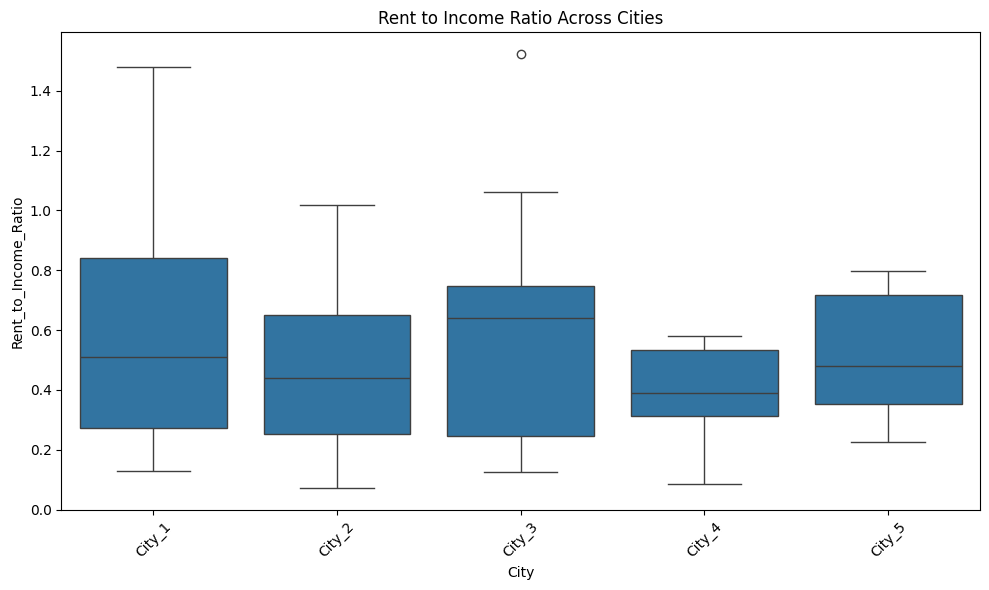

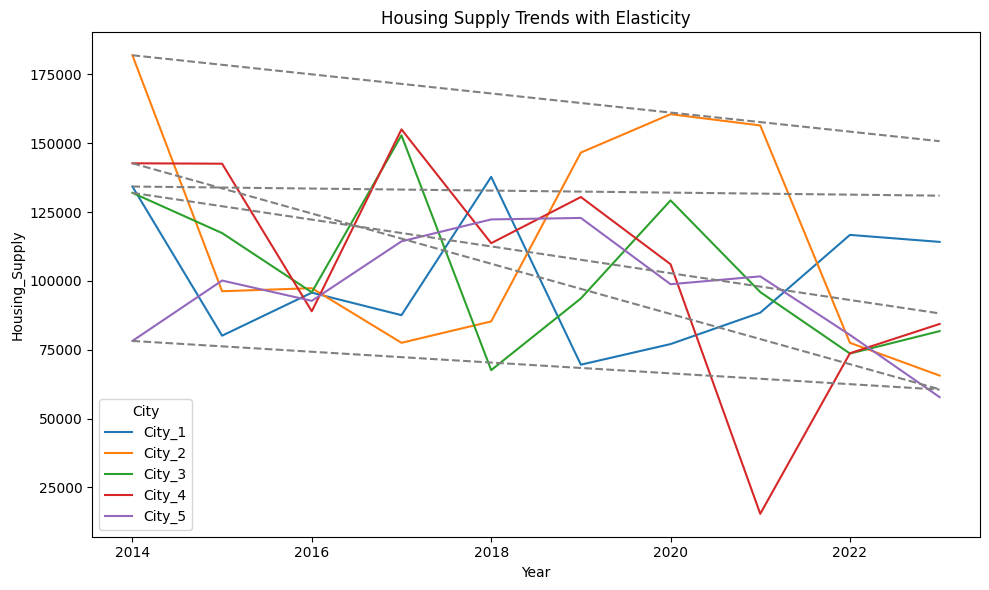

In [ ]:
# 1. Economic Logic Analysis
def economic_analysis(df):
    """Perform economic logic analysis on housing data"""
    print("# Economic Logic Analysis")

    # Rent Affordability
    print("\n## Rent Affordability")
    affordability_summary = df.groupby('City')['Rent_to_Income_Ratio'].agg(['mean', 'std'])
    print(affordability_summary)

    # Housing Supply Elasticity
    print("\n## Housing Supply Elasticity")
    supply_elasticity = df.groupby('City')[['Year', 'Housing_Supply']].apply(
        lambda x: np.polyfit(x['Year'], x['Housing_Supply'], 1)[0]
    )
    print(supply_elasticity)

    # Visualizations for good measure
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='City', y='Rent_to_Income_Ratio', data=df)
    plt.title('Rent to Income Ratio Across Cities')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Year', y='Housing_Supply', hue='City', data=df)
    # Add elasticity lines
    for city in df['City'].unique():
        elasticity = supply_elasticity[city]
        if not np.isnan(elasticity):  # Check for valid elasticity values
            x_vals = df[df['City'] == city]['Year']
            y_vals = df[df['City'] == city]['Housing_Supply'].iloc[0] + elasticity * (x_vals - x_vals.iloc[0])
            plt.plot(x_vals, y_vals, linestyle='--', color='gray')  # Plot elasticity line
    plt.title('Housing Supply Trends with Elasticity')
    plt.tight_layout()
    plt.show()

# Perform Analyses
economic_analysis(housing_df)

##Findings:
Mean rent represents 39-65% of  household income, which is very high. This is indicative of an afforability crisis and might be unsustainable.

Elasticity also indicates potential problems, as negative values indicate the house supply is deminishing. The situation is worst in city_4, where the rent prices are most afforable of the five cities.

##Economic Interpretation:
The housing market shows signs of structural inefficiency. The rent-to-income ratio indicates potential affordability challenges, while supply-demand misalignment suggests market rigidity and potential speculative pressures.

This report suggests that there is considerable opportunity for investments or policies of stimulation. In particular in City_4 as demand seems highest (lowest elasticity) while there is room to finance the construction of new housing (relatively afforable rent).

#2. Political Logic Analysis
Evaluation Question:
How can housing data be framed to support different political narratives?

In other words, is there something juicy that might create a policy window for 'my political views' (note, the data is generated randomly and does not reflect any political preference).

Metrics of Political Discourse:
* Population Demographic Shifts
* Housing Affordability Indices
* Spatial Distribution of Housing Developments





# Political Logic Analysis

## Gentrification Indicators
       Gentrification_Index Median_Income              
                       mean          mean           std
City                                                   
City_1             0.110123  58733.579473  26164.320254
City_2             0.103896  80780.769913  19141.041585
City_3             0.119056  60382.901062  23917.361690
City_4             0.083810  74054.363856  23061.207177
City_5             0.108432  63861.136685  14629.714103

## Correlation with Gentrification
                             Gentrification_Index  Median_Rent  Housing_Supply
City                                                                          
City_1 Gentrification_Index              1.000000    -0.378445        0.248330
       Median_Rent                      -0.378445     1.000000        0.567068
       Housing_Supply                    0.248330     0.567068        1.000000
City_2 Gentrification_Index              1.000000    -0.298329  

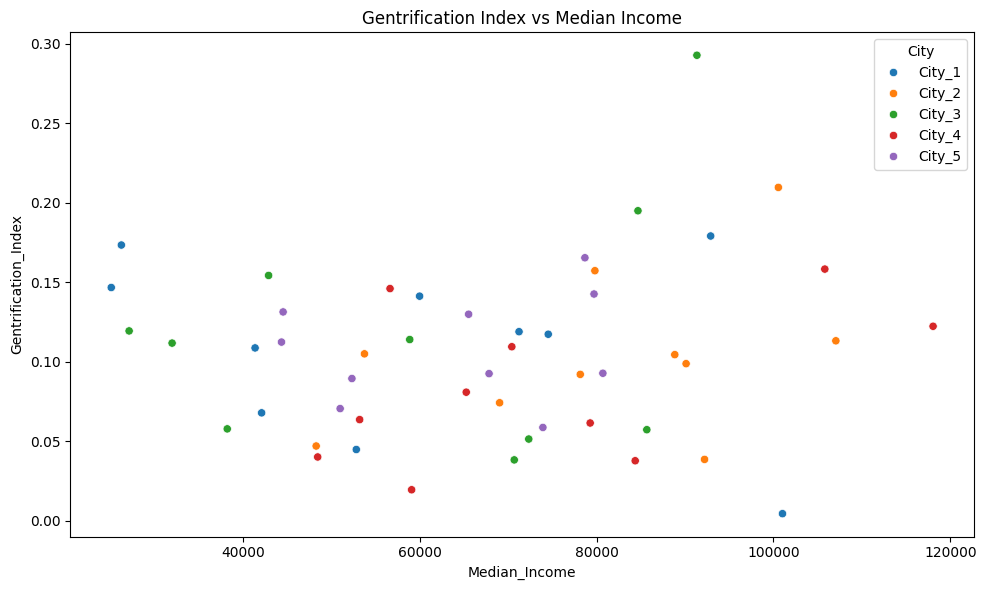

In [ ]:
# 2. Political Logic Analysis
def political_analysis(df):
    """Perform political logic analysis on housing data"""
    print("# Political Logic Analysis")

    # Gentrification Analysis
    print("\n## Gentrification Indicators")
    gentrification_summary = df.groupby('City')[['Gentrification_Index', 'Median_Income']].agg({
        'Gentrification_Index': 'mean',
        'Median_Income': ['mean', 'std']
    })
    print(gentrification_summary)

    # Correlation between Gentrification and Housing Metrics
    correlation_metrics = df.groupby('City')[['Gentrification_Index', 'Median_Rent', 'Housing_Supply']].apply(
        lambda x: x[['Gentrification_Index', 'Median_Rent', 'Housing_Supply']].corr()
    )
    print("\n## Correlation with Gentrification")
    print(correlation_metrics)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Median_Income', y='Gentrification_Index', hue='City', data=df)
    plt.title('Gentrification Index vs Median Income')
    plt.tight_layout()
    plt.show()

political_analysis(housing_df)

#Findings:
Relatively similar gentrification between cities, but variations might indicate differences in (ongoing) urban transformations. For instance, City_3 is highest indicating the largest changes in neighbourhood compositions.
Analysing this city further, we see that there are negative correlations with other metrics such as median rent and housing supply. This might be indicative of... (further research needed, lets say...) more demand for expansion than available.

##Political Interpretation:
Housing data reveals profound social inequalities. The spatial and economic distribution of housing demonstrates systematic marginalization and potential policy failures in equitable urban development. In particular, in City_3 we see (let's say) political tensions because the city needs more and/or different housing due to changing demographics, while this is currently being resisted. A call for change to embrace... blabla


#Reflection on using different logics
Each logic can provide a partial, potentially contradictory view of rental housing dynamics. Data interpretation requires constant reflexivity and contextual awareness. No single logic provides a comprehensive understanding or a 'real truth'. True understanding can only come from broad analysis and perspective taking.

Data are (not) neutral; they are actively constructed through interpretative frameworks (but). Multidimensional analysis reveals complex systemic interactions. Different logics offer complementary, not competing, perspectives. I show this in this example by...